In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("Deliveries.csv")

In [10]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [13]:
df.columns.tolist()

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batter',
 'bowler',
 'non_striker',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'extras_type',
 'is_wicket',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

over
0     0.981663
1     1.173528
2     1.316099
3     1.356538
4     1.369100
5     1.373055
6     1.103107
7     1.189948
8     1.242087
9     1.224577
10    1.262623
11    1.287686
12    1.301240
13    1.343645
14    1.393504
15    1.434273
16    1.498778
17    1.587839
18    1.646896
19    1.776855
Name: total_runs, dtype: float64


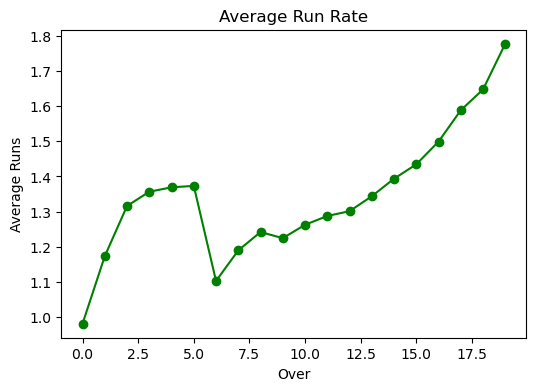

In [15]:
#1. Average Run Rate per 
avg_runrate = df.groupby('over')['total_runs'].mean()
print(avg_runrate)

plt.figure(figsize=(6,4))
avg_runrate.plot( kind = 'line', color = 'green', marker = 'o')
plt.title("Average Run Rate")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.show()


    over  wickets
0      0      463
1      1      503
2      2      533
3      3      548
4      4      576
5      5      540
6      6      444
7      7      472
8      8      537
9      9      498
10    10      568
11    11      567
12    12      585
13    13      633
14    14      695
15    15      736
16    16      779
17    17      976
18    18      989
19    19     1308


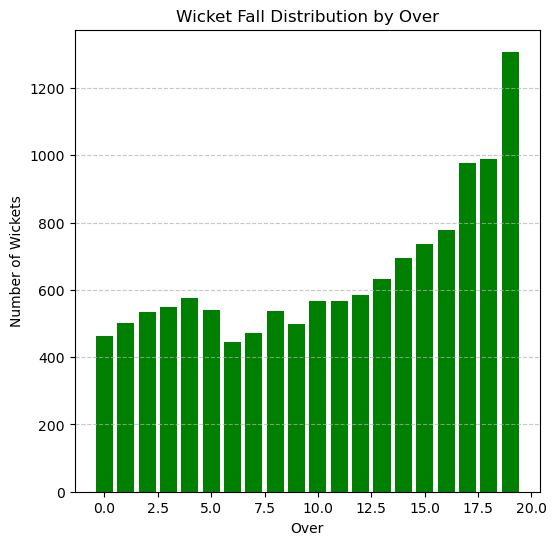

In [23]:
#2  Wicket Fall Distribution by Over

wickets_df = df[df['is_wicket'] == 1]
wicket_distribution = wickets_df.groupby('over').size().reset_index(name = 'wickets')
print(wicket_distribution)

plt.figure(figsize=(6, 6))
plt.bar(wicket_distribution['over'], wicket_distribution['wickets'], color='green')
plt.xlabel('Over')
plt.ylabel('Number of Wickets')
plt.title('Wicket Fall Distribution by Over')
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.xticks(range(0, max(wickets_by_over['over']) + 1))
plt.show()
        

In [25]:
#Partnership Analysis (Top 10 Partnerships by Total Runs)

#df['partnership'] = df.apply(lambda row: tuple(sorted([row['batter'], row['non_striker']])), axis=1)
#partnership_runs = df.groupby('partnership')['total_runs'].sum().reset_index()
#top_10_partnerships = partnership_runs.sort_values(by='total_runs', ascending=False).head(10)
#print(top_10_partnerships)


partnerships = df.groupby(['batter', 'non_striker'])['total_runs'].sum().reset_index()
top_10_partnerships = partnerships.nlargest(10, 'total_runs')
top_10_partnerships['partnership'] = top_10_partnerships['batter'] + ' & ' + top_10_partnerships['non_striker']
print(top_10_partnerships)

              batter     non_striker  total_runs               partnership
324   AB de Villiers         V Kohli        1623  AB de Villiers & V Kohli
1477        CH Gayle         V Kohli        1617        CH Gayle & V Kohli
8499         V Kohli  AB de Villiers        1511  V Kohli & AB de Villiers
1795       DA Warner        S Dhawan        1420      DA Warner & S Dhawan
8509         V Kohli        CH Gayle        1185        V Kohli & CH Gayle
6798      RV Uthappa       G Gambhir        1077    RV Uthappa & G Gambhir
8519         V Kohli    F du Plessis        1050    V Kohli & F du Plessis
2918    Ishan Kishan       RG Sharma         992  Ishan Kishan & RG Sharma
2361    F du Plessis         V Kohli         982    F du Plessis & V Kohli
6995        S Dhawan       DA Warner         937      S Dhawan & DA Warner


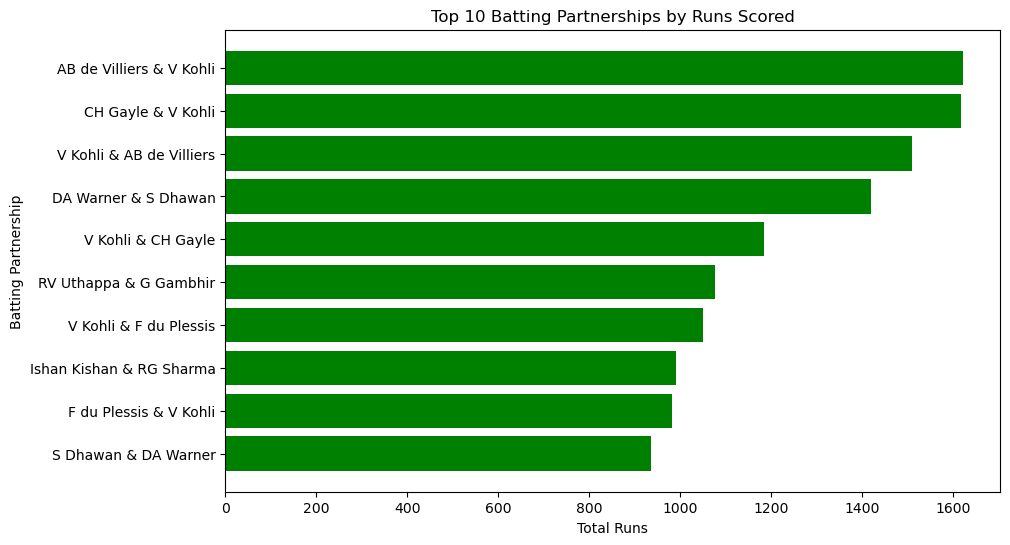

In [37]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_partnerships['partnership'], top_10_partnerships['total_runs'], color='green')
plt.title('Top 10 Batting Partnerships by Runs Scored')
plt.xlabel('Total Runs')
plt.ylabel('Batting Partnership')
plt.gca().invert_yaxis()
plt.show()

          batter     bowler  batsman_runs          batsman_bowler
5481   DA Warner  SP Narine           195  DA Warner vs SP Narine
26199    V Kohli   R Ashwin           179     V Kohli vs R Ashwin
22509   SK Raina  PP Chawla           175   SK Raina vs PP Chawla
19809  RG Sharma   UT Yadav           170   RG Sharma vs UT Yadav
26260    V Kohli   UT Yadav           168     V Kohli vs UT Yadav
26003    V Kohli   A Mishra           162     V Kohli vs A Mishra
11627   KL Rahul  DL Chahar           158   KL Rahul vs DL Chahar
26062    V Kohli   DJ Bravo           157     V Kohli vs DJ Bravo
26208    V Kohli  RA Jadeja           157    V Kohli vs RA Jadeja
5515   DA Warner  YS Chahal           156  DA Warner vs YS Chahal


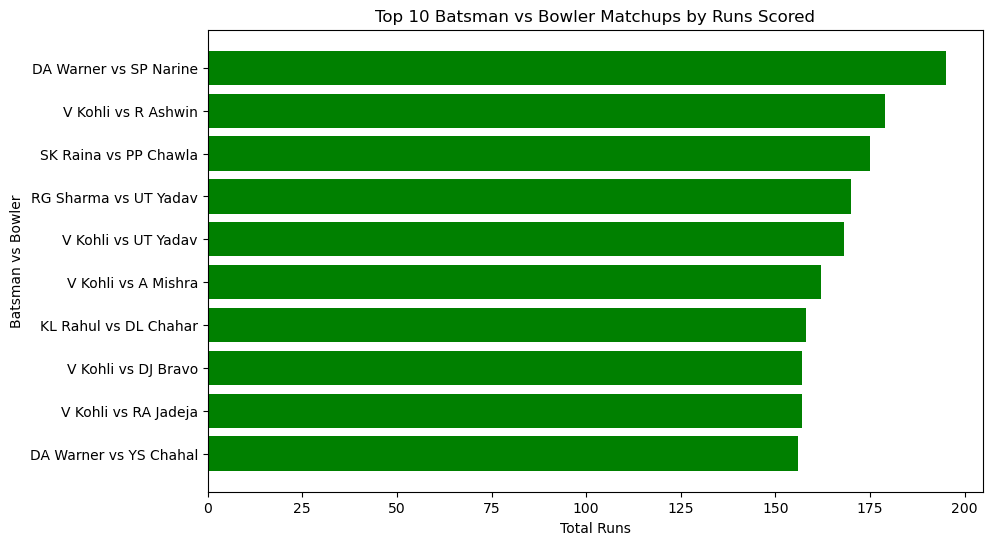

In [39]:
#Batsman vs Bowler Analysis

batsman_bowler = df.groupby(['batter', 'bowler'])['batsman_runs'].sum().reset_index()
top_10_bat_bowl = batsman_bowler.nlargest(10, 'batsman_runs')
top_10_bat_bowl['batsman_bowler'] = top_10_bat_bowl['batter'] + ' vs ' + top_10_bat_bowl['bowler']
print(top_10_bat_bowl)


plt.figure(figsize=(10, 6))
plt.barh(top_10_bat_bowl['batsman_bowler'], top_10_bat_bowl['batsman_runs'], color='green')
plt.title('Top 10 Batsman vs Bowler Matchups by Runs Scored')
plt.xlabel('Total Runs')
plt.ylabel('Batsman vs Bowler')
plt.gca().invert_yaxis()
plt.show()
